# Random Numbers
### Steps

#### Throw a dice 100x:
- if 1 or 2 -> one step down
- if 3,4 or 5 -> one step up
- if 6 -> throw dice again and walk restulting number
- you cannot go lower than 0
- you have a 0.1% chance of falling (start at step=0)

#### What's the chance of reaching 60 steps high?

In [102]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
np.random.seed(123)

In [104]:
# we start the walk at step 0
walk = [0]

# create a loop to mimic 100 throws
for i in range(100):

    # to make sure we calculate the step count based on the last element of the walk list
    step = walk[-1]

    # dice throw can land between 1 and 6
    dice = np.random.randint(1,7)
    
    if dice <= 2:
        # we pass the max() to make sure it doesn't go bellow 0 steps
        step = max(0, step-1)
    elif dice >= 3 and dice <= 5:
        step += 1
    else:
        new_roll = np.random.randint(1,7)
        step += new_roll
    walk.append(step)

In [105]:
print(walk)

[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60]


This gives a simulation of one Random Walk, and the last number will be the step we finish on (final step). 
<p>
Now, to calculate the probability of reaching step 60 we need to test multiple random walks! If we simulate this random walk thousands of times, we end up with thousands of final steps, giving us a distribution of final steps, which we can use to calculate the probability.

In [106]:
# this is a simulation of 10 final steps
final_step=[]
for i in range(10):
    walk = [0]
    for i in range(100):
        step = walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step-1)
        elif dice >= 3 and dice <= 5:
            step += 1
        else:
            new_roll = np.random.randint(1,7)
            step += new_roll
        walk.append(step)
    final_step.append(walk[-1])

In [107]:
print(final_step)

[73, 83, 68, 73, 106, 63, 76, 60, 87, 62]


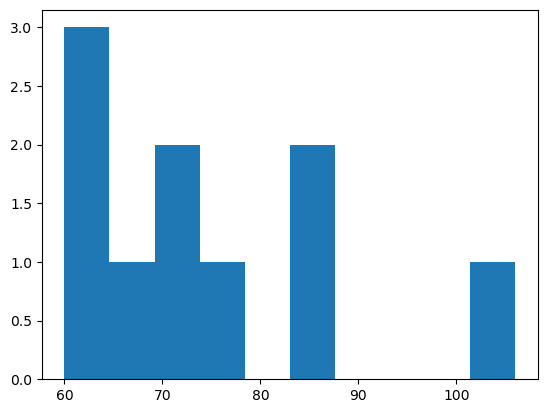

In [108]:
plt.hist(final_step)
plt.show()

In [115]:
# this is a simulation of 500 final steps
final_step=[]
for i in range(500):
    walk = [0]
    for i in range(100):
        step = walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step-1)
        elif dice >= 3 and dice <= 5:
            step += 1
        else:
            new_roll = np.random.randint(1,7)
            step += new_roll
        walk.append(step)
    final_step.append(walk[-1])

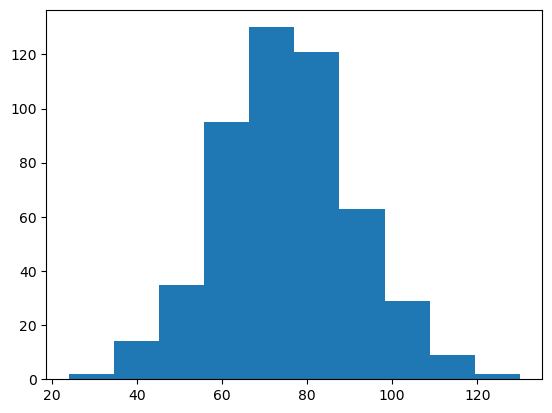

In [116]:
plt.hist(final_step)
plt.show()

You have a 0.1% chance to falling and strarting from step 0 again!
<p>
So we will implement that with an if statement

In [124]:
final_step=[]
for i in range(500):
    walk = [0]
    for i in range(100):
        step = walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step-1)
        elif dice >= 3 and dice <= 5:
            step += 1
        else:
            new_roll = np.random.randint(1,7)
            step += new_roll
        if np.random.rand() <= 0.001:
            step = 0
        walk.append(step)
    final_step.append(walk[-1])

In [125]:
print(final_step)

[87, 66, 94, 81, 73, 48, 59, 79, 80, 72, 59, 68, 77, 87, 76, 93, 73, 32, 103, 42, 79, 72, 70, 69, 75, 83, 77, 78, 89, 112, 97, 83, 95, 76, 67, 94, 68, 89, 64, 51, 82, 56, 79, 108, 76, 67, 18, 48, 64, 84, 50, 98, 83, 76, 47, 63, 68, 62, 102, 76, 51, 91, 21, 77, 53, 64, 59, 64, 70, 48, 41, 85, 85, 81, 61, 71, 58, 73, 91, 78, 80, 100, 66, 86, 80, 9, 62, 78, 70, 60, 61, 60, 75, 53, 89, 89, 29, 79, 67, 67, 74, 80, 89, 63, 90, 42, 105, 77, 78, 79, 49, 106, 72, 87, 61, 85, 75, 56, 71, 43, 88, 64, 58, 76, 70, 86, 115, 89, 51, 99, 22, 27, 78, 60, 51, 65, 45, 77, 75, 88, 81, 60, 68, 90, 73, 61, 62, 91, 64, 88, 58, 73, 79, 79, 60, 95, 66, 65, 58, 74, 68, 77, 86, 77, 70, 79, 76, 76, 70, 99, 31, 79, 72, 90, 86, 77, 56, 110, 50, 93, 63, 76, 87, 45, 85, 71, 112, 80, 63, 45, 25, 63, 57, 52, 97, 51, 88, 102, 92, 56, 71, 95, 83, 68, 62, 77, 73, 55, 63, 78, 55, 93, 77, 60, 77, 110, 41, 60, 89, 93, 56, 82, 72, 104, 106, 95, 83, 61, 44, 80, 81, 82, 87, 65, 83, 93, 59, 53, 28, 88, 39, 77, 69, 87, 14, 96, 59

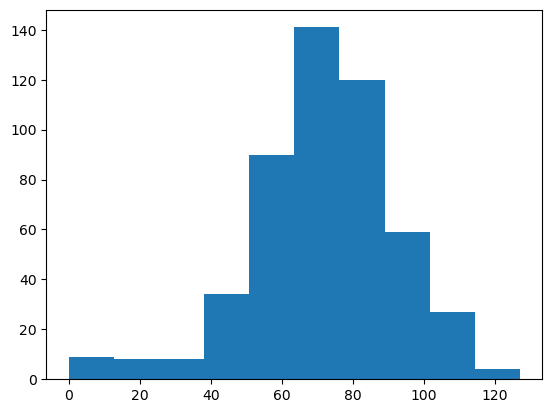

In [126]:
plt.hist(final_step)
plt.show()

In [131]:
np.mean(np.array(final_step) >= 60)

0.784